In [1]:
#Hier weren die Daten geladen

import numpy as np
import matplotlib.pyplot as plt
import os
import tabulate as tabulate
import latex_table as tab
from kafe2 import XYContainer, Fit, Plot, ContoursProfiler
from math import log10 , floor
import math
import pandas as pd

#Directory an dem die Daten sind
directory = "/home/jovyan/Praktikum_P2/242_Elementarladung_neu" #Directory

#Directory Festlegen und anzeigen
os.chdir(directory) #geht ins gewünschte Directory
directory_path = os.getcwd() #Derzeitiges Directory
print("My current directory is : " + directory_path)
folder_name = os.path.basename(directory_path) #Derzeitiger Ordner
print("My directory name is : " + folder_name)

My current directory is : /home/jovyan/Praktikum_P2/242_Elementarladung_neu
My directory name is : 242_Elementarladung_neu


In [2]:
######################################## Funktionen definieren ########################################

#################### Werte Drucken ####################
Drucken_Wert = True
def printwert(Variable, Einheit, Wert):
    if Drucken_Wert == True:
        print(Variable,"in",Einheit+":", Wert)
#a = 1.234
#printwert("a", "m", a)

#################### Fehler Drucken ####################
Drucken_Fehler = True
def printfehler(Variable, Einheit, Fehlerwert):
    if Drucken_Fehler == True:
        print("Fehler auf",Variable,"in",Einheit+":", Fehlerwert)
#a_err = 0.5678
#printfehler("a", "m", a_err)

#################### item zwischen Elemente in Liste einfügen ####################
def intersperse(lst, item):
    result = [item] * (len(lst) * 2 - 1)
    result[0::2] = lst
    return result

#################### Werte auf 3 signifikante Stellen runden ####################
def round_it(x, sig):
    if x == 0: # da die Runden-Funktion nicht bei 0 Funktioniert
        return 0
    elif x > 0:
        return round(x, sig-int(floor(log10(abs(x))))-1)
    elif x < 0:
        return round(x, sig-int(floor(log10(abs(x))))-1)
    elif math.isnan(x):
        return x
    else:
        return "error"

#a = 1.234
#print(round_it(a, 3))
#a2 = -1.234
#print(round_it(a2, 3))
#a3 = 0.0000
#print(round_it(a3, 3))

#################### Elemente in Liste auf 3 signifikante Stellen runden ####################
def round_list(list,k):
    list_rounded = []
    for element in list:
        if type(element) == float or np.float64:
            a = round_it(element,k)
            list_rounded.append(a)
        else:
            #print("Error in round_list: element is", type(element))
            list_rounded.append(element)
    return list_rounded

#a1 = [1.234, 5.678]
#print(round_list(a1, 3))

# 242.b

In [3]:
#242_b
print(f'{"242.b)":#^50}')

Messdaten = "242_Fadenstrahlrohr_neu.txt" #Dateiname

data = np.loadtxt(Messdaten)
print(data)

#Spalten der Datei auslesen
columb1 = data[:,0] #1.Spalte
columb2 = data[:,1] #2.Spalte
columb3 = data[:,2] #3.Spalte
columb4 = data[:,3] #4.Spalte
columb5 = data[:,4] #5.Spalte

#definiere N als Anzahl der Messwertpaare
N=len(columb1)
print("N:", N)

######################242.b)######################
[[1.00e+00 1.52e+02 1.25e-01 1.00e+00 9.70e-01]
 [2.00e+00 1.34e+02 8.50e-02 1.10e+00 1.05e+00]
 [3.00e+00 1.00e+02 5.00e-03 1.64e+00 1.63e+00]
 [4.00e+00 1.71e+02 9.90e-02 1.12e+00 1.11e+00]
 [5.00e+00 1.91e+02 9.30e-02 1.27e+00 1.19e+00]
 [6.00e+00 2.04e+02 7.20e-02 1.74e+00 1.70e+00]
 [7.00e+00 2.20e+02 1.11e-01 1.12e+00 1.09e+00]
 [8.00e+00 2.31e+02 6.60e-02 1.92e+00 2.04e+00]
 [9.00e+00 2.51e+02 5.20e-02 2.50e+00 2.51e+00]
 [1.00e+01 2.40e+02 1.07e-01 1.25e+00 1.22e+00]]
N: 10


In [4]:
#################### Literaturwerte ####################
print(f'{"Literaturwerte":#^50}')

My_0 = 1.25663706212e-6 #in N/A^-2 , Literaturwert https://physics.nist.gov/cgi-bin/cuu/Value?mu0 (Stand 02.11.2022)

My_0_err= 1.9*10**(-10)*10**(-6) #in N/A^-2 , Literaturwert https://physics.nist.gov/cgi-bin/cuu/Value?mu0 (Stand 02.11.2022)
print("Fehler auf My_0:", My_0_err)


#################### gemessene Werte ####################
print("\n", f'{"Gemessene Werte":#^50}')

Messung = columb1 #Natürliche Zahl

U = columb2 #in V
d = columb3 #in m
I_1 = columb4 #in A
I_2 = columb5 #in A

n = 130 #Wicklungszahl der Spule
R = 0.15 #in m, Abstand/Radius der Spulen


#################### gemessene Fehler ####################
print("\n", f'{"gemessene Fehler":#^50}')

Messung_err = np.array([0]*N) #0, da Anzahl
print("Fehler auf Nummer der Messung:", Messung_err)

U_err = np.array([3]*N) #in V
print("Fehler auf U in V:", U_err)
d_err = np.array([0.005]*N) #in m
print("Fehler auf d in m:", d_err)
I_1_err = np.array([0.02]*N) #in A
print("Fehler auf I_1 in A:", I_1_err)
I_2_err = np.array([0.02]*N) #in A
print("Fehler auf I_2 in A:", I_2_err)


n_err = 0 #0, da Anzahl
R_err = 0 #in m, 0 da gegeben in der Anleitung


#################### Werte berechnen ####################
print("\n", f'{"Werte berechnen":#^50}')

r = d/2
print("Radius r in m:", r)
I = (I_1+I_2)/2
print("Stromstärke I in A:", I)

#Berechnen von B_S
B_S = (4/5)**(3/2)*My_0*((n*I)/R)
print("Die Magnetische Flussdichte der Spule B_s in T:", B_S)

#Berechnung der Werte für das Diagramm
x = U
print("x-Werte U:", x)
y = (r*I)**2
print("y-Werte (r*I)**2:", y)


#################### Fehler berechnen ####################
print("\n", f'{"Fehler berechnen":#^50}')

s1 = (1/2)*d_err
r_err = (s1**2)**(1/2)
print("Fehler auf r in m:", r_err) 

s1 = (I_2/2)*I_1_err
s2 = (I_1/2)*I_2_err
I_err = (s1**2+s2**2)**(1/2)
print("Fehler auf I in A:", I_err)

s1 = (((4/5)**(3/2)*My_0*n/R))*I_err
B_S_err = (s1**2)**(1/2)
print("Fehler auf B_s in T:", B_S_err)

x_err = U_err
print("Fehler auf x-Werte:", x_err)

s1 = (2*r*I**2)*r_err
s2 = (2*r**2*I)*I_err
y_err = (s1**2+s2**2)**(1/2)
print("Fehler auf y-Werte", y_err)

x_data = x
y_data = y
x_err = U_err
y_err = y_err

##################Literaturwerte##################
Fehler auf My_0: 1.8999999999999998e-16

 #################Gemessene Werte##################

 #################gemessene Fehler#################
Fehler auf Nummer der Messung: [0 0 0 0 0 0 0 0 0 0]
Fehler auf U in V: [3 3 3 3 3 3 3 3 3 3]
Fehler auf d in m: [0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005]
Fehler auf I_1 in A: [0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02]
Fehler auf I_2 in A: [0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02]

 #################Werte berechnen##################
Radius r in m: [0.0625 0.0425 0.0025 0.0495 0.0465 0.036  0.0555 0.033  0.026  0.0535]
Stromstärke I in A: [0.985 1.075 1.635 1.115 1.23  1.72  1.105 1.98  2.505 1.235]
Die Magnetische Flussdichte der Spule B_s in T: [0.0007676  0.00083773 0.00127413 0.0008689  0.00095852 0.00134037
 0.00086111 0.00154299 0.00195211 0.00096242]
x-Werte U: [152. 134. 100. 171. 191. 204. 220. 231. 251. 240.]
y-Werte (r*I)**2: [3.78994141e-03 2.

In [5]:
#################### LaTex-Tabelle erstellen ####################

#print("Type of data:", type(data))
#print("Dimension of data:", data.ndim)

k = 3
columb1_rounded = round_list(x, k)
columb2_rounded = round_list(x_err, k)
columb3_rounded = round_list(y, k)
columb4_rounded = round_list(y_err, k)

table1 = tab.LatexTable([columb1_rounded, columb2_rounded, columb3_rounded, columb4_rounded])
print(table1)

print("\n")

print("$U$", "&", "$\Delta U$", "&", "$r^2I^2$", "&", "$\Delta r^2I^2$", "\\\ ")
#		\captionof{table}{Messwerte $238.a$}

\begin{tabular}{cccc}
\hline
152.0 & 3 & 0.00379 & 0.000322 \\ 
134.0 & 3 & 0.00209 & 0.000253 \\ 
100.0 & 3 & 1.67e-05 & 3.34e-05 \\ 
171.0 & 3 & 0.00305 & 0.00032 \\ 
191.0 & 3 & 0.00327 & 0.000364 \\ 
204.0 & 3 & 0.00383 & 0.000543 \\ 
220.0 & 3 & 0.00376 & 0.000355 \\ 
231.0 & 3 & 0.00427 & 0.000658 \\ 
251.0 & 3 & 0.00424 & 0.000825 \\ 
240.0 & 3 & 0.00437 & 0.000426 \\ 
\end{tabular} 



$U$ & $\Delta U$ & $r^2I^2$ & $\Delta r^2I^2$ \\ 


x: [152. 134. 100. 171. 191. 204. 220. 231. 251. 240.]
x_err: [3 3 3 3 3 3 3 3 3 3]
y: [3.78994141e-03 2.08734766e-03 1.67076562e-05 3.04621206e-03
 3.27126802e-03 3.83408640e-03 3.76106226e-03 4.26931560e-03
 4.24191690e-03 4.36557526e-03]
y_err: [3.21591335e-04 2.52571336e-04 3.34186539e-05 3.19533801e-04
 3.63727294e-04 5.43443461e-04 3.55144101e-04 6.58050649e-04
 8.24529265e-04 4.26275685e-04]
Anzahl der Wertepaare N: 10
Dies ist die Steigung m:  3.6274099288678894e-05
Dies ist der y-Achsenabschnitt n:  -0.003585892432147096
Dies ist die Varianz auf m (V[m]):  1.3534078330552207e-12
Dies ist die Varianz auf n (V[n]):  1.5639758761937935e-08
Dies ist die Kovarianz von m und n (Vmn):  -1.4242421875448436e-10
Wir erhalten die Güte als:  0.0015721521394399514


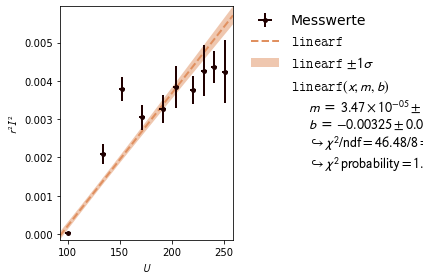

[[ 2.78778485e-12 -3.55990286e-10]
 [-3.55990286e-10  5.25401199e-08]]


In [6]:
#Hier wird der Geraden-Fit berechneet und geplottet

from kafe2 import XYContainer, Fit, Plot
import matplotlib.pyplot as plt
import numpy as np

print("x:", x)
print("x_err:", x_err)
print("y:", y)
print("y_err:", y_err)

#N = Anzahl der Wertepaare
print("Anzahl der Wertepaare N:" , N)

#Umbenennen der Variablen
x=x_data
y=y_data
# Fehler x_err und y_err werden aus der vorherigen zelle übernommen

#Bildung der Varianzgewichteten Mittelwerte z ∈ {x, y, xy, x^2}

#Bildung von Zähler und Nenner der Rechnungen z/y_err**2
sumyerr  = sum(1/(y_err)**2)
#print("Dies ist der Nenner der Mittelwerte:", sumyerr)
xdivyerr = sum(x/(y_err)**2)
#print("Dies ist der Zähler des x-Mittelwert:", xdivyerr)
ydivyerr = sum(y/(y_err)**2)
#print("Dies ist der Zähler des y-Mittelwert:", ydivyerr)
x2divyerr = sum((x**2)/(y_err)**2)
#print("Dies ist der Zähler des x^2-Mittelwert:", x2divyerr)
xydivyerr = sum((x*y)/(y_err)**2)
#print("Dies ist der Zähler des xy-Mittelwert:", xydivyerr)

#Bildung der Varianzgewichteten Mittelwerte
xMittel = xdivyerr/sumyerr
#print("Dies ist der varianzgewichteter Mittelwert von X: ",xMittel)
yMittel = ydivyerr/sumyerr
#print("Dies ist der varianzgewichteter Mittelwert von Y: ",yMittel)
x2Mittel = x2divyerr/sumyerr
#print("Dies ist der Mittelwert von X^2: ",x2Mittel)
xyMittel = xydivyerr/sumyerr
#print("Dies ist der Mittelwert von XY: ",xyMittel)


#Berechnung von m und n:
m_fit = (xyMittel-(xMittel*yMittel))/(x2Mittel-(xMittel)**2) #Steigung m
print("Dies ist die Steigung m: ",m_fit)
n_fit = yMittel - m_fit*xMittel #Achsenabschnitt n
print("Dies ist der y-Achsenabschnitt n: ",n_fit)

#Berechnung von den Varianzen:
sigmayMittel = N/sumyerr #Varianzgewichtete Standardabweichung Sigmay
#print("Dies ist die Varianzgemittelte Standardabweichung Sigmay: ", sigmayMittel)
Vm = sigmayMittel/(16*(x2Mittel-(xMittel)**2)) #Varianz der Steigung
print("Dies ist die Varianz auf m (V[m]): ",Vm)
Vn = x2Mittel*Vm #Varianz des Achsenabschnitt
print("Dies ist die Varianz auf n (V[n]): ",Vn)
Vmn = -Vm * xMittel #Kovarianz von m und n
print("Dies ist die Kovarianz von m und n (Vmn): ",Vmn)

#Berechnung der Güte:
xi2array = (y-m_fit*x-n_fit)**2/y_err #
xi2 = sum(xi2array)
#print("Dies ist der xi^2-Wert des Fits: ",xi2)
güte = xi2/(14-2) #Güte
print("Wir erhalten die Güte als: ", güte)


def linearf(x, m, b):# lineare Funktion aufstellen
    return m*x+b
def linfit(x_data, y_data, x_err, y_err): # funktion mit den daten als argumenten erstellen
    xy_data = XYContainer(x_data, y_data) # behälter für x und y erstellen
    xy_data.label = "Messwerte"
    xy_data.add_error(axis='x', err_val=x_err) # x-Fehlerbalken
    xy_data.add_error(axis='y', err_val=y_err) # y-Fehlerbalken
    linear_fit = Fit(data=xy_data, model_function=linearf) # Objekt mit dem xy- Behälter und der linearen Funkrion erzeugen
    fit_results = linear_fit.do_fit() # ergebnisse bestimmen und später ausgeben lassen
    #linear_fit.report()
    plot = Plot(fit_objects=linear_fit) 
    plot.x_label = "$U$" #Achsenbeschriftung x-Achse
    plot.y_label = "$r^2I^2$" #Achsenbeschriftung y-Achse
    plot.plot()
    #plot als jpg abspeichern und anzeigen
    plt.savefig('242b_Fit.jpg', dpi = 300)
    plt.show() #Plot anzeigen
    return fit_results

# Ergebnisse in der Kovarianzmatrix ausgeben lassen
print(linfit(x_data, y_data, x_err, y_err)['parameter_cov_mat'])

In [7]:
#################### e/m aus der Formel berechnen ####################
print(f'{"e/m aus der Formel berechnen":#^50}')

#Berechnung aus der Formel
spez_lad = (2*U)/(r**2*B_S**2)
print("e/m:", spez_lad)

#Durchschnitt für e/m aus der Formel
spez_lad_avg = np.average(spez_lad)
print("Durchschnitt von e/m aus der Formel:", spez_lad_avg)

#################### Fehler berechnen ####################
print(f'{"Fehler berechnen":#^50}')

s1 = (2/(r**2*B_S**2))*U_err
s2 = ((-4*U)/(r**3*B_S**2))*r_err
s3 = ((-4*U)/(r**2*B_S**3))*B_S_err
spez_lad_err = (s1**2+s2**2+s3**2)**(1/2)
print("Fehler auf e/m aus der der Formel:", spez_lad_err)

spez_lad_err_avg = np.average(spez_lad_err)
print("Durchschnitt des Fehlers auf e/m aus der Formel:", spez_lad_err_avg)

#################### e/m aus dem Fit berechnen ####################
print(f'{"e/m aus dem Fit berechnen":#^50}')

spez_lad = (1/m_fit)*((2*R**2)/(((4/5)**(3/2))**2*My_0**2*n**2))
print("e/m aus dem Fit in C/kg:", spez_lad)

#################### Fehler berechnen ####################
print(f'{"Fehler berechnen":#^50}')

s1 = ((-1/m_fit**2)*((2*R**2)/(((4/5)**(3/2))**2*My_0**2*n**2)))*Vm
spez_lad_err = (s1**2)**(1/2)
print("Fehler auf e/m aus dem Fit", spez_lad_err)

#################### Literaturwert ####################
print(f'{"Literaturwert":#^50}')

spez_lad_lit = -1.75882001076*10**11 #in C/kg, https://physics.nist.gov/cgi-bin/cuu/Value?esme
print("Literaturwert für e/m:", spez_lad_lit)
spez_lad_lit_err = 0.00000000053*10**11 #in C/kg,  https://physics.nist.gov/cgi-bin/cuu/Value?esme
print("Fehler auf Literaturwert für e/m:", spez_lad_lit_err)

###########e/m aus der Formel berechnen###########
e/m: [1.32083087e+11 2.11420030e+11 1.97115415e+13 1.84872408e+11
 1.92288521e+11 1.75228358e+11 1.92640802e+11 1.78192672e+11
 1.94871211e+11 1.81053065e+11]
Durchschnitt von e/m aus der Formel: 2135419163746.8464
#################Fehler berechnen#################
Fehler auf e/m aus der der Formel: [1.15069528e+10 2.60162534e+10 3.94314595e+13 1.96616335e+10
 2.15925369e+10 2.49701914e+10 1.83791059e+10 2.75630359e+10
 3.79499397e+10 1.78231596e+10]
Durchschnitt des Fehlers auf e/m aus der Formel: 3963692232753.061
############e/m aus dem Fit berechnen#############
e/m aus dem Fit in C/kg: 90790306504.4553
#################Fehler berechnen#################
Fehler auf e/m aus dem Fit 3387.4393685348855
##################Literaturwert###################
Literaturwert für e/m: -175882001076.0
Fehler auf Literaturwert für e/m: 53.0


In [8]:
#################### B_E berechnen ####################
print(f'{"B_E berechnen":#^50}')

I_dif = abs(I_1-I_2)/2
print("I_dif in A:", I_dif)

B_E = (4/5)**(3/2)*My_0*(n/R)*I_dif
print("Erdmagnetfeld B_E in T:", B_E)

B_E_err_avg = np.average(B_E)
print("Durchschnitt von B_E in T:", B_E_err_avg)

#################### Fehler berechnen ####################
print(f'{"Fehler berechnen":#^50}')

s1 = (1/2)*I_1_err
s2 = (1/2)*I_2_err
I_dif_err = (s1**2+s2**2)**(1/2)
print("Fehler auf I_dif in A:", I_dif_err)

s1 = ((4/5)**(3/2)*My_0*(n/R))*I_dif_err
B_E_err = (s1**2)**(1/2)
print("Fehler auf B_E in T:", B_E_err)
print("n:", n)
print("R:", R)

B_E_err_avg = np.average(B_E)
print("Durchschnitt von B_E in T:", B_E_err_avg)

B_E_err_avg = np.average(B_E_err)
print("Durchschnitt des Fehlers auf B_E in T:", B_E_err_avg)

#################### Literaturwert ####################
print(f'{"Literaturwert":#^50}')

B_E_lit = 20/1000/1000 # Umrechnung von µT in T (horizontale Komponente) Quelle: https://www.chemie.de/lexikon/Erdmagnetfeld.html (Stand:25.11.2022 10:19 Uhr)
print("Literaturwert des Erdmagnetfeld in T:", B_E_lit)


##################B_E berechnen###################
I_dif in A: [0.015 0.025 0.005 0.005 0.04  0.02  0.015 0.06  0.005 0.015]
Erdmagnetfeld B_E in T: [1.16892917e-05 1.94821529e-05 3.89643057e-06 3.89643057e-06
 3.11714446e-05 1.55857223e-05 1.16892917e-05 4.67571669e-05
 3.89643057e-06 1.16892917e-05]
Durchschnitt von B_E in T: 1.5975365349047363e-05
#################Fehler berechnen#################
Fehler auf I_dif in A: [0.01414214 0.01414214 0.01414214 0.01414214 0.01414214 0.01414214
 0.01414214 0.01414214 0.01414214 0.01414214]
Fehler auf B_E in T: [1.10207699e-05 1.10207699e-05 1.10207699e-05 1.10207699e-05
 1.10207699e-05 1.10207699e-05 1.10207699e-05 1.10207699e-05
 1.10207699e-05 1.10207699e-05]
n: 130
R: 0.15
Durchschnitt von B_E in T: 1.5975365349047363e-05
Durchschnitt des Fehlers auf B_E in T: 1.102076992218925e-05
##################Literaturwert###################
Literaturwert des Erdmagnetfeld in T: 2e-05


In [9]:
#################### LaTex-Tabelle erstellen ####################

#print("Type of data:", type(data))
#print("Dimension of data:", data.ndim)

k = 3
columb1_rounded = round_list(B_E, k)
columb2_rounded = round_list(B_E_err, k)

table1 = tab.LatexTable([columb1_rounded, columb2_rounded])
print(table1)

print("\n")

print("$B_E$", "&", "$\Delta B_E$", "\\\ ")
#		\captionof{table}{Messwerte $238.a$}

\begin{tabular}{cc}
\hline
1.17e-05 & 1.1e-05 \\ 
1.95e-05 & 1.1e-05 \\ 
3.9e-06 & 1.1e-05 \\ 
3.9e-06 & 1.1e-05 \\ 
3.12e-05 & 1.1e-05 \\ 
1.56e-05 & 1.1e-05 \\ 
1.17e-05 & 1.1e-05 \\ 
4.68e-05 & 1.1e-05 \\ 
3.9e-06 & 1.1e-05 \\ 
1.17e-05 & 1.1e-05 \\ 
\end{tabular} 



$B_E$ & $\Delta B_E$ \\ 


# 242.e     242.f

In [10]:
#Hier weren die Daten geladen

import numpy as np
import os
import pandas as pd
from colorama import Fore, Back, Style


#Directory an dem die Daten sind
Messdaten = "242_Millikan_neu_aussortiert.txt" #Dateiname

#Daten Laden und ausgeben
data = np.loadtxt(Messdaten)
print(data)
#print(type(data))

#################### Tabellen-Werte ####################
print(f'{"Tabellen-Werte":#^50}')

columb1 = data[:,0] #1.Spalte
columb2 = data[:,1] #2.Spalte
columb3 = data[:,2] #3.Spalte
columb4 = data[:,3] #4.Spalte
columb5 = data[:,4] #5.Spalte
columb6 = data[:,5] #6.Spalte
columb7 = data[:,6] #7.Spalte
columb8 = data[:,7] #8.Spalte

line1 = data[0,:] #1.Zeile
#line2 = data[1,:] #2.Zeile
#line3 = data[2,:] #3.Zeile
#line4 = data[3,:] #4.Zeile
#line5 = data[4,:] #5.Zeile
#line6 = data[5,:] #6.Zeile
#line7 = data[6,:] #7.Zeile
#line8 = data[7,:] #8.Zeile

[[ 1.    2.    5.    1.67  5.   14.94 10.    2.6 ]
 [ 2.    1.    5.    3.28  5.    5.6  10.    3.38]
 [ 2.    2.    5.    4.06  5.    4.71 10.    2.48]
 [ 2.    3.    5.    3.95  5.    4.06 10.    2.5 ]
 [ 2.    4.    5.    3.3   5.    4.51 10.    2.61]
 [ 2.    5.    5.    3.    5.    4.57 10.    2.53]
 [ 3.    1.    5.    2.96  5.    6.03 10.    3.35]
 [ 4.    1.    5.    1.58  5.    5.94 10.    1.94]
 [ 5.    3.    5.    5.59  5.    4.41 10.    2.6 ]
 [ 5.    4.    5.    4.05  5.    4.29 10.    2.18]
 [ 5.    5.    5.    2.46  5.    3.63 10.    1.93]
 [ 6.    2.    5.    4.34  5.    6.82 10.    3.86]
 [ 6.    3.    5.    4.63  5.    6.75 10.    6.32]
 [ 7.    1.    5.    2.95  5.   10.61 10.    3.36]
 [ 8.    1.    5.    2.03  5.    8.13 10.    2.35]
 [ 9.    2.    5.    1.74  5.    8.33 10.    2.68]
 [10.    2.    5.    1.85  5.   10.08 10.    2.58]
 [11.    5.    5.    0.96  5.   10.   10.    1.75]
 [12.    2.    5.    1.26  5.   11.28 10.    2.26]
 [12.    3.    5.    1.2   5.  

In [11]:
#LaTex-Tabelle erstellen

#################### Tabellen-Werte ####################
print(f'{"Tabellen-Werte":#^50}')

A = len(columb1)
print("Anzahl der Zeilen: A:", A)

B = len(line1)
print("Anzahl der Spalten: B:", B)

#################### Tabelle erstellen ####################
print(f'{"Tabelle erstellen":#^50}')

i = 0 #Zähler für die Schleife: Zeilen
j = 0 #Zähler für die Schleife: Spalten

print("\\begin{center}")
print("	\\begin{tabular}{"+"|c"*8+"|}")
print("		\\hline")
print("		$N$ & $1-5$ & $s_h$ & $t_h$ & $s_0$ & $t_0$ & $s_r$ & $t_r$ \\\ ")
print("		\\hline")

for i in list(range(A)): #geht die Zeilen durch #oder "for line in data:"
    b = ["		"] #einzelne LaTex-Zeile die ausgedruckt werte
    for j in list(range(B-1)): #geht eintröge der Zeile durch
        cellj = data[i,j]
        b.append(cellj)
        b.append("&")
        j = j+1
    cell_last = data[i, j]
    b.append(cell_last)
    b.append("\\\ ")
    result = ' '.join(str(item) for item in b) #https://bobbyhadz.com/blog/python-print-list-without-commas-and-brackets#:~:text=Use%20the%20sep%20argument%20to,without%20commas%2C%20brackets%20and%20quotes.
    print(str(result).replace(".",",").replace(",0 & "," & ")) #https://www.reddit.com/r/learnpython/comments/gx89os/how_to_use_python_with_comma_instead_of_dot_as/ #https://www.delftstack.com/de/howto/python/python-truncate-float-python/
    i = i+1

print("		\\hline")
print("	\\end{tabular}")
print("\\end{center}")

##################Tabellen-Werte##################
Anzahl der Zeilen: A: 25
Anzahl der Spalten: B: 8
################Tabelle erstellen#################
\begin{center}
	\begin{tabular}{|c|c|c|c|c|c|c|c|}
		\hline
		$N$ & $1-5$ & $s_h$ & $t_h$ & $s_0$ & $t_0$ & $s_r$ & $t_r$ \\ 
		\hline
		 1 & 2 & 5 & 1,67 & 5 & 14,94 & 10 & 2,6 \\ 
		 2 & 1 & 5 & 3,28 & 5 & 5,6 & 10 & 3,38 \\ 
		 2 & 2 & 5 & 4,06 & 5 & 4,71 & 10 & 2,48 \\ 
		 2 & 3 & 5 & 3,95 & 5 & 4,06 & 10 & 2,5 \\ 
		 2 & 4 & 5 & 3,3 & 5 & 4,51 & 10 & 2,61 \\ 
		 2 & 5 & 5 & 3 & 5 & 4,57 & 10 & 2,53 \\ 
		 3 & 1 & 5 & 2,96 & 5 & 6,03 & 10 & 3,35 \\ 
		 4 & 1 & 5 & 1,58 & 5 & 5,94 & 10 & 1,94 \\ 
		 5 & 3 & 5 & 5,59 & 5 & 4,41 & 10 & 2,6 \\ 
		 5 & 4 & 5 & 4,05 & 5 & 4,29 & 10 & 2,18 \\ 
		 5 & 5 & 5 & 2,46 & 5 & 3,63 & 10 & 1,93 \\ 
		 6 & 2 & 5 & 4,34 & 5 & 6,82 & 10 & 3,86 \\ 
		 6 & 3 & 5 & 4,63 & 5 & 6,75 & 10 & 6,32 \\ 
		 7 & 1 & 5 & 2,95 & 5 & 10,61 & 10 & 3,36 \\ 
		 8 & 1 & 5 & 2,03 & 5 & 8,13 & 10 & 2,35 \\ 
		 9 & 2 & 5 &

# 242.g

In [12]:
#242_g
print(f'{"242_g)":#^50}')

######################################## Werte für ralle Tropfen ########################################
print(f'{"Werte für alle Tropfen":#^50}')

ny_eff = 18.17/1000/1000 #Umrechnung von mykro Pa * s in Pa * s
print("ny_eff in Pa * s:", ny_eff)
rho_o = 866 # in kg/m**3
print("rho_o in kg/m**3:", rho_o)
rho_l = 1.225 # in kg/m**3
print("rho_l in kg/m**3:", rho_l)
g = 9.81 # in m/s**2
print("g in m/s**2:", g)

d = 7.62/1000 #Umrechnung von mm in m
print("Durchmesser d in m:", d)
U = 500 # in V
print("Spannung U in V", U)

E = U/d
print("ElektE in V/m:", E)

ny_eff_err = 0.048/1000/1000
print("ny_eff_err in Pa * s:", ny_eff_err)

t_h_err = 0.5 #in s
print("Fehler auf die Zeit t in s:", t_h_err)
s_h_err = 1*(0.5/1000) #Umrechnung von in m
print("Fehler auf die Zeit t in m:", s_h_err)
t_0_err = 0.5 #in s
print("Fehler auf die Zeit t in s:", t_0_err)
s_0_err = 1*(0.5/1000) #Umrechnung von in m
print("Fehler auf die Zeit t in m:", s_0_err)
t_r_err = 0.5 #in s
print("Fehler auf die Zeit t in s:", t_r_err)
s_r_err = 1*(0.5/1000) #Umrechnung von in m
print("Fehler auf die Zeit t in m:", s_r_err)

######################242_g)######################
##############Werte für alle Tropfen##############
ny_eff in Pa * s: 1.817e-05
rho_o in kg/m**3: 866
rho_l in kg/m**3: 1.225
g in m/s**2: 9.81
Durchmesser d in m: 0.00762
Spannung U in V 500
ElektE in V/m: 65616.79790026246
ny_eff_err in Pa * s: 4.8e-08
Fehler auf die Zeit t in s: 0.5
Fehler auf die Zeit t in m: 0.0005
Fehler auf die Zeit t in s: 0.5
Fehler auf die Zeit t in m: 0.0005
Fehler auf die Zeit t in s: 0.5
Fehler auf die Zeit t in m: 0.0005


In [13]:
#################### Werte aus data in b packen ####################
print(f'{"Werte aus data in b packen":#^50}')

b = [] #leere Liste für alle Tröpfchen --> Elemente sind T_data
#print("b:", b)
#print("Type b:", type(b))

T_data = [] #leere Liste für die Daten eines Tröpchens --> Elemente sind Zeilen der text-Datei
#print("T_data:", T_data)
#print("Type T_data:", type(T_data))

N_first = data[0,0] #Startwert der Nummer der Tröpchen
#print("N_first:", N_first)
#print("Type N_first:", type(N_first))

N_last = N_first # Zuletzt verwendete Nummer innerhald der Schleife --> bevor die Schleife startet ist es der erste Wert: N_first
#print("N_last:", N_last)
#print("Type N_last:", type(N_last))


#################### Start Schleife ####################
#print(f'{"Schleife":#^50}')

for line in data: #gehr die Zeilen der txt-Datie (data) durch
    
    N = line[0] #Nummer des aktuelles Tröpchens: N #line[0] bezeichnet den ersten Wert der Zeile

    if N == N_last: #Wenn die Nummer des Tröpfchens die gleiche ist, wie die zuvor verwendete, wird die Bedingung ausgeführt:
        
        T_data.append(list(line)) #Fügt die aktuelle Zeile T_data hinzu #es wird list(line) verwendet, damit die Zahlen mit Kommas getrennt werden und man eine Liste von Listen erhält
    
    else: # Wenn die Zeile zu einen neuen Tröpfchen gehört, wir die Bedigung ausgeführt:
        
        b.append(T_data) #T_data des vorherigen Tröfchens in b packen
        
        T_data = [] #Neues T_data für neues Troüfchen erstellen
        N_last = N #Aktuelle Zeile N merken für nächsten Vergleich
        T_data.append(list(line)) # fügt die aktuelle Zeile dem neuen T_data hinzu
    
    #print("T_data:", T_data)
    
b.append(T_data) #T_data des letzten Tröfchens in b packen #(steht außerhalb der for-Schleife)

#################### b ausgeben ####################
#print(f'{"b ausgeben":#^50}')

#print("b:", b)
#print("Type b:", type(b))

print("Matrix darstellung von b: \n", np.matrix(b, dtype="object"))

############Werte aus data in b packen############
Matrix darstellung von b: 
 [[list([[1.0, 2.0, 5.0, 1.67, 5.0, 14.94, 10.0, 2.6]])
  list([[2.0, 1.0, 5.0, 3.28, 5.0, 5.6, 10.0, 3.38], [2.0, 2.0, 5.0, 4.06, 5.0, 4.71, 10.0, 2.48], [2.0, 3.0, 5.0, 3.95, 5.0, 4.06, 10.0, 2.5], [2.0, 4.0, 5.0, 3.3, 5.0, 4.51, 10.0, 2.61], [2.0, 5.0, 5.0, 3.0, 5.0, 4.57, 10.0, 2.53]])
  list([[3.0, 1.0, 5.0, 2.96, 5.0, 6.03, 10.0, 3.35]])
  list([[4.0, 1.0, 5.0, 1.58, 5.0, 5.94, 10.0, 1.94]])
  list([[5.0, 3.0, 5.0, 5.59, 5.0, 4.41, 10.0, 2.6], [5.0, 4.0, 5.0, 4.05, 5.0, 4.29, 10.0, 2.18], [5.0, 5.0, 5.0, 2.46, 5.0, 3.63, 10.0, 1.93]])
  list([[6.0, 2.0, 5.0, 4.34, 5.0, 6.82, 10.0, 3.86], [6.0, 3.0, 5.0, 4.63, 5.0, 6.75, 10.0, 6.32]])
  list([[7.0, 1.0, 5.0, 2.95, 5.0, 10.61, 10.0, 3.36]])
  list([[8.0, 1.0, 5.0, 2.03, 5.0, 8.13, 10.0, 2.35]])
  list([[9.0, 2.0, 5.0, 1.74, 5.0, 8.33, 10.0, 2.68]])
  list([[10.0, 2.0, 5.0, 1.85, 5.0, 10.08, 10.0, 2.58]])
  list([[11.0, 5.0, 5.0, 0.96, 5.0, 10.0, 10.0, 1.7

In [14]:
from math import log10 , floor
#Funktionen definieren zum auslesen von einzelnen Messgößen eines Tröpfchens: s_h_5_(alle 5)
def messgröße(i, j): #Messwerte eines Tröpfchens aus b auslesen
    c = np.array(b, dtype="object")[i-1] #aus b ein Array machen und das i-te Tröpfchen auslesen
    d = np.array(c, dtype="object")[:,j-1] #aus dem N-ten Tröpfchen ein Array machen und die j-te Mewwgröße auslesen 
    return d

"""
#Beispiel für eine bestimmte Messgröße eines bestimmten Tröpfchens
t_h_5 = messgröße(5, 4) #(erste Zahl: Tröpfchennummer, zweite Zahl: Größe (Spalennummer in der Tabelle))
print("t_h_5:", t_h_5)
"""

#Funktion definieren zum auslesen einzelner Messwerte eines Tröpfchens einer Messreihe: s_h_5_(einer von 5)
def messwert(i,j,k): #Messwert eines Tröpfchens aus b auslesen
    c = np.array(b, dtype="object")[i-1]  #aus b ein Array machen und das i-te Tröpfchen auslesen
    d = np.array(c, dtype="object")[k-1,j-1] #aus dem N-ten Tröpfchen ein Array machen und den k-ten Messwert der j-ten Messreihe auslesen 
    return d    

"""
#Beispiel für eine bestimmte Messgröße eines bestimmten Tröpfchens
t_h_5_1 = messwert(5, 4, 1) #(erste Zahl: Tröpfchennummer, zweite Zahl: Größe (Spalennummer in der Tabelle), dritte Zahl: Messwertnummer)
print("t_h_5_1:", t_h_5_1)
"""

#Funktion definieren zum Runden von Elementen in Listen
def round_it(x, sig):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [15]:
from math import log10 , floor

Drucken0 = False #Tröpfchennummer
Drucken1 = False #gemessene Werte
Drucken2 = False #Messgrößen s_h, t_j, s_0, t_0, s_r, t_0

Drucken3 = False #Mittelwerte
Drucken4 = False #Geschwindigkeiten
Drucken5 = False #Gleichung Rechts, Links, Abweichung
Drucken6 = False #q und r

Drucken7 = False #Fehler auf Mittelwerte
Drucken8 = False #Fehler auf Geschwindigkeiten
Drucken9 = False #Fehler auf Gleichung Rechts, Links, Abweichung
Drucken10 = False #Fehler auf q und r

Drucken11 = False #Überschriften der Berechnungen
Drucken12 = True #LaTex-Tabellen

#################### leere Listen für die LaTex-Tabelle erstellen ####################
#print(f'{"leere Arrays für zu berechnende Werte und deren Fehler erstellen":#^30}')

Tröpchennummer = []

#berechnete Werte
s_h_Mittel_Tabelle = []
t_h_Mittel_Tabelle = []
s_0_Mittel_Tabelle = []
t_0_Mittel_Tabelle = []
s_r_Mittel_Tabelle = []
t_r_Mittel_Tabelle = []
v_h_Tabelle = []
v_0_Tabelle = []
v_r_Tabelle = []
Gl_links_Tabelle = []
Gl_rechts_Tabelle = []
abw_Tabelle = []
r_Tabelle = []
q_Tabelle = []

#berechnete Fehler
s_h_Mittel_err_Tabelle = []
t_h_Mittel_err_Tabelle = []
s_0_Mittel_err_Tabelle = []
t_0_Mittel_err_Tabelle = []
s_r_Mittel_err_Tabelle = []
t_r_Mittel_err_Tabelle = []
v_h_err_Tabelle = []
v_0_err_Tabelle = []
v_r_err_Tabelle = []
Gl_links_err_Tabelle = []
Gl_rechts_err_Tabelle = []
abw_err_Tabelle = []
r_err_Tabelle = []
q_err_Tabelle = []

#################### leere Listen für zu berechnende Werte und deren Fehler erstellen ####################
if Drucken1 is True: print(f'{"leere Arrays für zu berechnende Werte und deren Fehler erstellen":#^30}')

r = [] #leere List für die Werte für den Radius r der Tröpfchen
#print("r:", r)
q = [] #leere Liste für die Werte für die Ladung q der Tröpfchen
#print("q:", q)
r_err = [] #leere Liste für die Werte für den Radius r der Tröpfchen
#print("r_err:", r_err)
q_err = [] #leere Liste für die Werte für die Ladung q der Tröpfchen
#print("q_err:", q_err)

######################################## Start der Schleife ########################################
print(f'{"Start der Schleife":#^50}')

for i in list(range(len(b))): #geht Tröpchen in b durch
    
    i = i+1 #+1, da i von 0 anfäng zu zählen
    I = str(messwert(i,1,1)).replace(".0","") #für die print befehle #ab hier Neue nummerierung der Tröpchen beim Drucken, wenn die Tröpchen aussortiert wurden

    #################### Tröpfchen i ####################
    if Drucken0 is True: print(f'{"Tröpfchen_"+I:#^100}')
    
    #################### gemessene Werte ####################
    if Drucken11 is True: print(f'{"gemessene Werte":#^30}')

    column1 = messgröße(i,1) #i-tes Tröpfchen 1.Spalte
    if Drucken1 is True: print("column1:", column1)
    column2 = messgröße(i,2) #i-tes Tröpfchen 2.Spalte
    if Drucken1 is True: print("column2:", column2)
    column3 = messgröße(i,3) #i-tes Tröpfchen 3.Spalte
    if Drucken1 is True: print("column3:", column3)
    column4 = messgröße(i,4) #i-tes Tröpfchen 4.Spalte
    if Drucken1 is True: print("column4:", column4)
    column5 = messgröße(i,5) #i-tes Tröpfchen 5.Spalte
    if Drucken1 is True: print("column5:", column5)
    column6 = messgröße(i,6) #i-tes Tröpfchen 6.Spalte
    if Drucken1 is True: print("column6:", column6)
    column7 = messgröße(i,7) #i-tes Tröpfchen 7.Spalte
    if Drucken1 is True: print("column7:", column7)
    column8 = messgröße(i,8) #i-tes Tröpfchen 8.Spalte
    if Drucken1 is True: print("column8:", column8)
    
    j = len(column1)
    if Drucken1 is True: print("Anzahl der Messreihen j:", j)
        
    s_h = column3*(0.5/1000)
    if Drucken2 is True: print(f'{"s_h_"+I+" in m:"}', s_h)
    t_h = column4
    if Drucken2 is True: print(f'{"t_h_"+I+" in s:"}', t_h)
    s_0 = column5*(0.5/1000)
    if Drucken2 is True: print(f'{"s_0_"+I+" in m:"}', s_0)
    t_0 = column6
    if Drucken2 is True: print(f'{"t_0_"+I+" in s:"}', t_0)
    s_r = column7*(0.5/1000)
    if Drucken2 is True: print(f'{"s_r_"+I+" in m:"}', s_r)
    t_r = column8
    if Drucken2 is True: print(f'{"t_r_"+I+" in s:"}', t_r)
    
    #################### Werte berechnen ####################
    if Drucken11 is True: print(f'{"Werte berechnen":#^30}')
    
    s_h_Mittel = np.average(s_h)
    if Drucken3 is True: print(f'{"Mittelwert für s_h_"+I+" in m:"}', s_h_Mittel)
    t_h_Mittel = np.average(t_h)
    if Drucken3 is True: print(f'{"Mittelwert für t_h_"+I+" in s:"}', t_h_Mittel)
    s_0_Mittel = np.average(s_0)
    if Drucken3 is True: print(f'{"Mittelwert für s_0_"+I+" in m:"}', s_0_Mittel)
    t_0_Mittel = np.average(t_0)
    if Drucken3 is True: print(f'{"Mittelwert für t_0_"+I+" in s:"}', t_0_Mittel)
    s_r_Mittel = np.average(s_r)
    if Drucken3 is True: print(f'{"Mittelwert für s_r_"+I+" in m:"}', s_r_Mittel)
    t_r_Mittel = np.average(t_r)
    if Drucken3 is True: print(f'{"Mittelwert für t_r_"+I+" in s:"}', t_r_Mittel)
    
    v_h = s_h_Mittel/t_h_Mittel
    if Drucken4 is True: print(f'{"Geschwindigkeit v_h_"+I+" in m/s:"}', v_h)
    v_0 = s_0_Mittel/t_0_Mittel
    if Drucken4 is True: print(f'{"Geschwindigkeit v_0_"+I+" in m/s:"}', v_0)
    v_r = s_r_Mittel/t_r_Mittel
    if Drucken4 is True: print(f'{"Geschwindigkeit v_r_"+I+" in m/s:"}', v_r)
    
    Gl_links =2*v_0
    if Drucken5 is True: print(f'{"Gl_links_"+I+" :"}', Gl_links)
    Gl_rechts = v_r-v_h
    if Drucken5 is True: print(f'{"Gl_rechts_"+I+" :"}', Gl_rechts)
    abw = (1- Gl_rechts/Gl_links)*100
    if Drucken5 is True: print(f'{"relative Abweichung_"+I+" in Prozent %:"}', abw)

    r_i = ((9*ny_eff*(v_r-v_h))/(4*g*(rho_o-rho_l)))**(1/2)
    if Drucken6 is True: print(f'{"Radius r_"+I+" in m:"}', r_i)
    r.append(r_i)
    
    q_i = 3*np.pi*ny_eff*r_i*((v_r+v_h)/E)
    if Drucken6 is True: print(f'{"Gesamtladung q_"+I+" = N*e in C:"}', q_i)
    q.append(abs(q_i))
    
    #################### Fehler berechnen ####################
    if Drucken11 is  True: print(f'{"Fehler berechnen":#^30}')
        
    s_h_Mittel_err = ((1/j)*s_h_err**2)**(1/2)
    if Drucken7 is True: print(f'{"Fehler auf s_h_"+I+"_Mittel in m:"}', s_h_Mittel_err)
    t_h_Mittel_err = ((1/j)*t_h_err**2)**(1/2)
    if Drucken7 is True: print(f'{"Fehler auf t_h_"+I+"_Mittel in s:"}', t_h_Mittel_err)
    s_0_Mittel_err = ((1/j)*s_0_err**2)**(1/2)
    if Drucken7 is True: print(f'{"Fehler auf s_0_"+I+"_Mittel in m:"}', s_0_Mittel_err)
    t_0_Mittel_err = ((1/j)*t_0_err**2)**(1/2)
    if Drucken7 is True: print(f'{"Fehler auf t_0_"+I+"_Mittel in s:"}', t_0_Mittel_err)
    s_r_Mittel_err = ((1/j)*s_r_err**2)**(1/2)
    if Drucken7 is True: print(f'{"Fehler auf s_r_"+I+"_Mittel in m:"}', s_r_Mittel_err)
    t_r_Mittel_err = ((1/j)*t_r_err**2)**(1/2)
    if Drucken7 is True: print(f'{"Fehler auf t_r_"+I+"_Mittel in s:"}', t_r_Mittel_err)
    
    s1 = (1/t_h_Mittel)*s_h_Mittel_err
    s2 = (-s_h_Mittel/t_h_Mittel**2)*t_h_Mittel_err
    v_h_err = (s1**2+s2**2)**(1/2)
    if Drucken8 is True: print(f'{"Fehler auf v_h_"+I+" in m/s:"}', v_h_err)
    s1 = (1/t_0_Mittel)*s_0_Mittel_err
    s2 = (-s_0_Mittel/t_0_Mittel**2)*t_0_Mittel_err
    v_0_err = (s1**2+s2**2)**(1/2)
    if Drucken8 is True: print(f'{"Fehler auf v_0_"+I+" in m/s:"}', v_0_err)
    s1 = (1/t_r_Mittel)*s_r_Mittel_err
    s2 = (-s_r_Mittel/t_r_Mittel**2)*t_r_Mittel_err
    v_r_err = (s1**2+s2**2)**(1/2)
    if Drucken8 is True: print(f'{"Fehler auf v_r_"+I+" in m/s:"}', v_r_err)
    
    Gl_links_err = ((2)*v_0_err)**(1/2)
    if Drucken9 is True: print(f'{"Fehler auf Gl_links_"+I+" in m/s:"}', Gl_links_err)
    Gl_rechts_err = ((1*v_h_err)**2+(-1*v_r_err)**2)**(1/2)
    if Drucken9 is True: print(f'{"Fehler auf Gl_rechts_"+I+" in m/s:"}', Gl_rechts_err)
    abw_err = (((-100/Gl_links)*Gl_rechts_err)**2+(((100*Gl_rechts)/Gl_links**2)*Gl_links_err)**2)**(1/2)
    if Drucken9 is True: print(f'{"Fehler auf die relative Abweichung_"+I+"  in Prozent %:"}', abw_err) 
    
    s1 = ((((ny_eff*(v_h-v_r))/(g*(rho_l-rho_o)))**(1/3))/(4*ny_eff))*ny_eff_err
    s2 = ((3*ny_eff)/(4*g*(rho_o-rho_l)*((ny_eff*(v_r-v_h))/(g*rho_o-rho_l))**(1/3)))*v_r_err
    s3 = ((3*ny_eff)/(4*g*(rho_o-rho_l)*((ny_eff*(v_r-v_h))/(g*rho_o-rho_l))**(1/3)))*v_h_err
    r_i_err = (s1**2+s2**2+s3**2)**(1/2)
    if Drucken10 is True: print(f'{"Fehler auf r_"+I+" in m:"}', r_i_err)
    r_err.append(r_i_err)
    
    s1 = (3*np.pi*r_i*((v_r+v_h)/E))*ny_eff_err
    s2 = (3*np.pi*ny_eff*((v_r+v_h)/E))*r_i_err
    s3 = (3*np.pi*ny_eff*r_i*(1/E))*v_r_err
    s4 = (3*np.pi*ny_eff*r_i*(1/E))*v_h_err
    q_i_err = (s1**2+s2**2+s3**2+s4**2)**(1/2)
    if Drucken10 is True: print(f'{"Fehler auf q_"+I+" in c:"}', q_i_err)
    q_err.append(abs(q_i_err))
    
    #################### Tabelle erstellen ####################
    if Drucken11 is True: print(f'{"Tabelle erstellen":#^50}')
    #print("\n")
    
    Tröpchennummer.append(i)
    Tröpchennummer.append("&")
    
    #berechnete Werte
    s_h_Mittel_round = round_it(s_h_Mittel,3)
    s_h_Mittel_Tabelle.append(s_h_Mittel_round)
    s_h_Mittel_Tabelle.append("&")
    t_h_Mittel_round = round_it(t_h_Mittel,3)
    t_h_Mittel_Tabelle.append(t_h_Mittel_round)
    t_h_Mittel_Tabelle.append("&")
    s_0_Mittel_round = round_it(s_0_Mittel,3)
    s_0_Mittel_Tabelle.append(s_0_Mittel_round)
    s_0_Mittel_Tabelle.append("&")
    t_0_Mittel_round = round_it(t_0_Mittel,3)
    t_0_Mittel_Tabelle.append(t_0_Mittel_round)
    t_0_Mittel_Tabelle.append("&")
    s_r_Mittel_round = round_it(s_r_Mittel,3)
    s_r_Mittel_Tabelle.append(s_r_Mittel_round)
    s_r_Mittel_Tabelle.append("&")
    t_r_Mittel_round = round_it(t_r_Mittel,3)
    t_r_Mittel_Tabelle.append(t_r_Mittel_round)
    t_r_Mittel_Tabelle.append("&")
    
    v_h_round = round_it(v_h,3)
    v_h_Tabelle.append(v_h_round)
    v_h_Tabelle.append("&")
    v_0_round = round_it(v_0,3)
    v_0_Tabelle.append(v_0_round)
    v_0_Tabelle.append("&")
    v_r_round = round_it(v_r,3)
    v_r_Tabelle.append(v_r_round)
    v_r_Tabelle.append("&")
    
    Gl_links_round = round_it(Gl_links,3)
    Gl_links_Tabelle.append(Gl_links_round)
    Gl_links_Tabelle.append("&")
    Gl_rechts_round = round_it(Gl_rechts,3)
    Gl_rechts_Tabelle.append(Gl_rechts_round)
    Gl_rechts_Tabelle.append("&")
    abw_round = round_it(abw,3)
    abw_Tabelle.append(abw_round)
    abw_Tabelle.append("&")
    
    r_round = round_it(r_i,3)
    r_Tabelle.append(r_round)
    r_Tabelle.append("&")
    q_round = round_it(q_i,3)
    q_Tabelle.append(q_round)
    q_Tabelle.append("&")

    #berechnete Fehler
    s_h_Mittel_err_round = round_it(s_h_Mittel_err,3)
    s_h_Mittel_err_Tabelle.append(s_h_Mittel_err_round)
    s_h_Mittel_err_Tabelle.append("&")
    t_h_Mittel_err_round = round_it(t_h_Mittel_err,3)
    t_h_Mittel_err_Tabelle.append(t_h_Mittel_err_round)
    t_h_Mittel_err_Tabelle.append("&")
    s_0_Mittel_err_round = round_it(s_0_Mittel_err,3)
    s_0_Mittel_err_Tabelle.append(s_0_Mittel_err_round)
    s_0_Mittel_err_Tabelle.append("&")
    t_0_Mittel_err_round = round_it(t_0_Mittel_err,3)
    t_0_Mittel_err_Tabelle.append(t_0_Mittel_err_round)
    t_0_Mittel_err_Tabelle.append("&")
    s_r_Mittel_err_round = round_it(s_r_Mittel_err,3)
    s_r_Mittel_err_Tabelle.append(s_r_Mittel_err_round)
    s_r_Mittel_err_Tabelle.append("&")
    t_r_Mittel_err_round = round_it(t_r_Mittel_err,3)
    t_r_Mittel_err_Tabelle.append(t_r_Mittel_err_round)
    t_r_Mittel_err_Tabelle.append("&")
    
    v_h_err_round = round_it(v_h_err,3)
    v_h_err_Tabelle.append(v_h_err_round)
    v_h_err_Tabelle.append("&")
    v_0_err_round = round_it(v_0_err,3)
    v_0_err_Tabelle.append(v_0_err_round)
    v_0_err_Tabelle.append("&")
    v_r_err_round = round_it(v_r_err,3)
    v_r_err_Tabelle.append(v_r_err_round)
    v_r_err_Tabelle.append("&")
    
    Gl_links_err_round = round_it(Gl_links_err,3)
    Gl_links_err_Tabelle.append(Gl_links_err_round)
    Gl_links_err_Tabelle.append("&")
    Gl_rechts_err_round = round_it(Gl_rechts_err,3)
    Gl_rechts_err_Tabelle.append(Gl_rechts_err_round)
    Gl_rechts_err_Tabelle.append("&")
    abw_err_round = round_it(abw_err,3)
    abw_err_Tabelle.append(abw_err_round)
    abw_err_Tabelle.append("&")
    
    r_err_round = round_it(r_i_err,3)
    r_err_Tabelle.append(r_err_round)
    r_err_Tabelle.append("&")
    q_err_round = round_it(q_i_err,3)
    q_err_Tabelle.append(q_err_round)
    q_err_Tabelle.append("&")
    
#################### Ende der Schleife ####################
print(f'{"Ende der Schleife":#^50}')

#################### Tabelle drucken ####################
if Drucken11 is  True: print(f'{"Tabelle drucken":#^50}')
print("\n")

# letztes "&" in den Listen streichen
del Tröpchennummer[-1]
del s_h_Mittel_Tabelle[-1]
del t_h_Mittel_Tabelle[-1]
del s_0_Mittel_Tabelle[-1]
del t_0_Mittel_Tabelle[-1]
del s_r_Mittel_Tabelle[-1]
del t_r_Mittel_Tabelle[-1]
del v_h_Tabelle[-1]
del v_0_Tabelle[-1]
del v_r_Tabelle[-1]
del Gl_links_Tabelle[-1]
del Gl_rechts_Tabelle[-1]
del abw_Tabelle[-1]
del r_Tabelle[-1]
del q_Tabelle[-1]
del s_h_Mittel_err_Tabelle[-1]
del t_h_Mittel_err_Tabelle[-1]
del s_0_Mittel_err_Tabelle[-1]
del t_0_Mittel_err_Tabelle[-1]
del s_r_Mittel_err_Tabelle[-1]
del t_r_Mittel_err_Tabelle[-1]
del v_h_err_Tabelle[-1]
del v_0_err_Tabelle[-1]
del v_r_err_Tabelle[-1]
del Gl_links_err_Tabelle[-1]
del Gl_rechts_err_Tabelle[-1]
del abw_err_Tabelle[-1]
del r_err_Tabelle[-1]
del q_err_Tabelle[-1]

#Ersetzen: . durch , (für LaTex) #Nur String-elemente aus den Listen
Tröpfchennummer = str(' '.join(str(item) for item in Tröpchennummer)).replace(".",",").replace(",0 & "," & ")
s_h_Mittel_Tabelle = str(' '.join(str(item) for item in s_h_Mittel_Tabelle)).replace(".",",").replace(",0 & "," & ")
t_h_Mittel_Tabelle = str(' '.join(str(item) for item in t_h_Mittel_Tabelle)).replace(".",",").replace(",0 & "," & ")
s_0_Mittel_Tabelle = str(' '.join(str(item) for item in s_0_Mittel_Tabelle)).replace(".",",").replace(",0 & "," & ")
t_0_Mittel_Tabelle = str(' '.join(str(item) for item in t_0_Mittel_Tabelle)).replace(".",",").replace(",0 & "," & ")
s_r_Mittel_Tabelle = str(' '.join(str(item) for item in s_r_Mittel_Tabelle)).replace(".",",").replace(",0 & "," & ")
t_r_Mittel_Tabelle = str(' '.join(str(item) for item in t_r_Mittel_Tabelle)).replace(".",",").replace(",0 & "," & ")

v_h_Tabelle = str(' '.join(str(item) for item in v_h_Tabelle)).replace(".",",").replace(",0 & "," & ")
v_0_Tabelle = str(' '.join(str(item) for item in v_0_Tabelle)).replace(".",",").replace(",0 & "," & ")
v_r_Tabelle = str(' '.join(str(item) for item in v_r_Tabelle)).replace(".",",").replace(",0 & "," & ")

Gl_links_Tabelle = str(' '.join(str(item) for item in Gl_links_Tabelle)).replace(".",",").replace(",0 & "," & ")
Gl_rechts_Tabelle = str(' '.join(str(item) for item in Gl_rechts_Tabelle)).replace(".",",").replace(",0 & "," & ")
abw_Tabelle = str(' '.join(str(item) for item in abw_Tabelle)).replace(".",",").replace(",0 & "," & ")

r_Tabelle = str(' '.join(str(item) for item in r_Tabelle)).replace(".",",").replace(",0 & "," & ")
q_Tabelle = str(' '.join(str(item) for item in q_Tabelle)).replace(".",",").replace(",0 & "," & ")

s_h_Mittel_err_Tabelle = str(' '.join(str(item) for item in s_h_Mittel_err_Tabelle)).replace(".",",").replace(",0 & "," & ")
t_h_Mittel_err_Tabelle = str(' '.join(str(item) for item in t_h_Mittel_err_Tabelle)).replace(".",",").replace(",0 & "," & ")
s_0_Mittel_err_Tabelle = str(' '.join(str(item) for item in s_0_Mittel_err_Tabelle)).replace(".",",").replace(",0 & "," & ")
t_0_Mittel_err_Tabelle = str(' '.join(str(item) for item in t_0_Mittel_err_Tabelle)).replace(".",",").replace(",0 & "," & ")
s_r_Mittel_err_Tabelle = str(' '.join(str(item) for item in s_r_Mittel_err_Tabelle)).replace(".",",").replace(",0 & "," & ")
t_r_Mittel_err_Tabelle = str(' '.join(str(item) for item in t_r_Mittel_err_Tabelle)).replace(".",",").replace(",0 & "," & ")

v_h_err_Tabelle = str(' '.join(str(item) for item in v_h_err_Tabelle)).replace(".",",").replace(",0 & "," & ")
v_0_err_Tabelle = str(' '.join(str(item) for item in v_0_err_Tabelle)).replace(".",",").replace(",0 & "," & ")
v_r_err_Tabelle = str(' '.join(str(item) for item in v_r_err_Tabelle)).replace(".",",").replace(",0 & "," & ")

Gl_links_err_Tabelle = str(' '.join(str(item) for item in Gl_links_err_Tabelle)).replace(".",",").replace(",0 & "," & ")
Gl_rechts_err_Tabelle = str(' '.join(str(item) for item in Gl_rechts_err_Tabelle)).replace(".",",").replace(",0 & "," & ")
abw_err_Tabelle = str(' '.join(str(item) for item in abw_err_Tabelle)).replace(".",",").replace(",0 & "," & ")

r_err_Tabelle = str(' '.join(str(item) for item in r_err_Tabelle)).replace(".",",").replace(",0 & "," & ")
q_err_Tabelle = str(' '.join(str(item) for item in q_err_Tabelle)).replace(".",",").replace(",0 & "," & ")

#Tabelle ausgeben

Delta = "\\Delta"

if Drucken12 is True: print("\\begin{center}")
if Drucken12 is True: print("	\\begin{landscape}")
if Drucken12 is True: print("	\\resizebox{23cm}{!}{")
if Drucken12 is True: print("		\\begin{tabular}{"+"|c"*16+"|}")

if Drucken12 is True: print("			\\hline")
if Drucken12 is True: print(f'{"			Nummer"}', "&", Tröpfchennummer, " \\\ ")
if Drucken12 is True: print("			\\hline")
if Drucken12 is True: print(f'{"			$s_{h,i}$ in m:"}', "&", s_h_Mittel_Tabelle, " \\\ ")
if Drucken12 is True: print(f'{"			$t_{h,i}$ in s:"}', "&", t_h_Mittel_Tabelle, " \\\ ")
if Drucken12 is True: print(f'{"			$s_{0,i}$ in m:"}', "&", s_0_Mittel_Tabelle, " \\\ ")
if Drucken12 is True: print(f'{"			$t_{0,i}$ in s:"}', "&", t_0_Mittel_Tabelle, " \\\ ")
if Drucken12 is True: print(f'{"			$s_{r,i}$ in m:"}', "&", s_r_Mittel_Tabelle, " \\\ ")
if Drucken12 is True: print(f'{"			$t_{r,i}$ in s:"}', "&", t_r_Mittel_Tabelle, " \\\ ")
if Drucken12 is True: print(f'{"			$v_{h,i}$ in m/s:"}', "&", v_h_Tabelle, " \\\ ")
if Drucken12 is True: print(f'{"			$v_{0,i}$ in m/s:"}', "&", v_0_Tabelle, " \\\ ")
if Drucken12 is True: print(f'{"			$v_{r,i}$ in m/s:"}', "&", v_r_Tabelle, " \\\ ")
if Drucken12 is True: print(f'{"			$Gl_{links,i}$ in m/s:"}', "&", Gl_links_Tabelle, " \\\ ")
if Drucken12 is True: print(f'{"			$Gl_{rechts,i}$ in m/s:"}', "&", Gl_rechts_Tabelle, " \\\ ")
if Drucken12 is True: print(f'{"			$abw_i$:"}', "&", abw_Tabelle, " \\\ ")
if Drucken12 is True: print(f'{"			$r_i$ in m:"}', "&", r_Tabelle, " \\\ ")
if Drucken12 is True: print(f'{"			$q_i$ in C:"}', "&", q_Tabelle, " \\\ ")

if Drucken12 is True: print(f'{"			$"+Delta+" s_{h,i}$ in m:"}', "&", s_h_Mittel_err_Tabelle, " \\\ ")
if Drucken12 is True: print(f'{"			$"+Delta+" t_{h,i}$ in s:"}', "&", t_h_Mittel_err_Tabelle, " \\\ ")
if Drucken12 is True: print(f'{"			$"+Delta+" s_{0,i}$ in m:"}', "&", s_0_Mittel_err_Tabelle, " \\\ ")
if Drucken12 is True: print(f'{"			$"+Delta+" t_{0,i}$ in s:"}', "&", t_0_Mittel_err_Tabelle, " \\\ ")
if Drucken12 is True: print(f'{"			$"+Delta+" s_{r,i}$ in m:"}', "&", s_r_Mittel_err_Tabelle, " \\\ ")
if Drucken12 is True: print(f'{"			$"+Delta+" t_{r,i}$ in s:"}', "&", t_r_Mittel_err_Tabelle, " \\\ ")
if Drucken12 is True: print(f'{"			$"+Delta+" v_{h,i}$ in m/s:"}', "&", v_h_err_Tabelle, " \\\ ")
if Drucken12 is True: print(f'{"			$"+Delta+" v_{0,i}$ in m/s:"}', "&", v_0_err_Tabelle, " \\\ ")
if Drucken12 is True: print(f'{"			$"+Delta+" v_{r,i}$ in m/s:"}', "&", v_r_err_Tabelle, " \\\ ")
if Drucken12 is True: print(f'{"			$"+Delta+" Gl_{links,i}$ in m/s:"}', "&", Gl_links_err_Tabelle, " \\\ ")
if Drucken12 is True: print(f'{"			$"+Delta+" Gl_{rechts,i}$ in m/s:"}', "&", Gl_rechts_err_Tabelle, " \\\ ")
if Drucken12 is True: print(f'{"			$"+Delta+" abw_i$:"}', "&", abw_err_Tabelle, " \\\ ")
if Drucken12 is True: print(f'{"			$"+Delta+" r_i$ in m:"}', "&", r_err_Tabelle, " \\\ ")
if Drucken12 is True: print(f'{"			$"+Delta+" q_i$ in C:"}', "&", q_err_Tabelle, " \\\ ")
if Drucken12 is True: print("			\\hline")

if Drucken12 is True: print("		\\end{tabular}")
if Drucken12 is True: print("	}")
if Drucken12 is True: print("	\\end{landscape}")
if Drucken12 is True: print("\\end{center}")


#################### q und r drucken ####################
if Drucken11 is True: print(f'{"q und r drucken":#^50}')
print("\n")

print("q:", q)
print("q_err:", q_err)
print("r:", r)
print("r_err", r_err)

################Start der Schleife################
################Ende der Schleife#################


\begin{center}
	\begin{landscape}
	\resizebox{23cm}{!}{
		\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
			\hline
			Nummer & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 & 12 & 13 & 14 & 15  \\ 
			\hline
			$s_{h,i}$ in m: & 0,0025 & 0,0025 & 0,0025 & 0,0025 & 0,0025 & 0,0025 & 0,0025 & 0,0025 & 0,0025 & 0,0025 & 0,0025 & 0,0025 & 0,0025 & 0,003 & 0,0025  \\ 
			$t_{h,i}$ in s: & 1,67 & 3,52 & 2,96 & 1,58 & 4,03 & 4,48 & 2,95 & 2,03 & 1,74 & 1,85 & 0,96 & 1,23 & 2,16 & 2,53 & 1,44  \\ 
			$s_{0,i}$ in m: & 0,0025 & 0,0025 & 0,0025 & 0,0025 & 0,0025 & 0,0025 & 0,0025 & 0,0025 & 0,0025 & 0,0025 & 0,0025 & 0,0025 & 0,0025 & 0,0025 & 0,0025  \\ 
			$t_{0,i}$ in s: & 14,9 & 4,69 & 6,03 & 5,94 & 4,11 & 6,78 & 10,6 & 8,13 & 8,33 & 10,1 & 10 & 10,7 & 8,18 & 5,98 & 7,68  \\ 
			$s_{r,i}$ in m: & 0,005 & 0,005 & 0,005 & 0,005 & 0,005 & 0,005 & 0,005 & 0,005 & 0,005 & 0,005 & 0,005 & 0,00

# 242.h

In [16]:
#242_h
print(f'{"242_h)":#^50}')

#Literaturwert
e = 1.602176487*10**(-19) #in C https://www.chemie.de/lexikon/Elementarladung.html
print("Literaturwert für die Elementarladung e:",e)

#################### Werte der Größe nach sortiert ####################
print(f'{"Werte der Größe nach sortiert":#^50}')

#Tupel aus q und q_err erstellen, damit sie zusammen sortiert werden
q_tupel = [] #lista
for item in zip(q, q_err):
    q_tupel.append(item)
#print("q_tupel:", q_tupel)

q_tupel_sorted = list(sorted(q_tupel)) #list
#print("q_tupel sorted:", q_tupel_sorted)

q_sorted = list(list(zip(*q_tupel_sorted))[0]) #list
print("\n", "q sortiert in C:", q_sorted)
#print("Länge der Liste q-Werten:", len(q_sorted))

q_err_sorted = list(list(zip(*q_tupel_sorted))[1]) #list
print("\n", "q_err sortiert in C:", q_err_sorted)


#differenzen der Werte berechnen. Da sie zuvor der größe nach sortiert wurden, etspricht die kleinste Differenz dem ggT (glaube ich)

dif = list(np.diff(np.array(q_sorted))) #list
print("\n", "dif:", dif)

#print("Länge der Liste an Differenzen:", len(dif))

dif_sorted = list(np.sort(np.array(dif))) #list
print("\n", "dif_sorted:", dif_sorted)

difkl = dif_sorted[0]
print("\n", "kleinste Differenz ist:", difkl)

print("das ergibt aber keinen Sinn also wird der Wert genommen, der Näher am Literatuwert ist. die Werte, bei denen die Differen zu klein ist bedeuten, das die Ladung der Tröpfchen identisch war, also ist die Differenz eigentlich 0")
j = 2
difkl_sinnvoll = (dif_sorted[j]) #dritter Wert
print("kleinste Different, die Sinn ergibt:", difkl_sinnvoll)

print("der Fehler auf die Differenzen ist der größte Fehler der Subtrahenden")
print("Fehler auf q_3:", q_err_sorted[j])
print("Fehler auf q_4:", q_err_sorted[j+1])

if q_err_sorted[2] >= q_err_sorted[3]:
    print("größerer Fehler ist q_3_err:", q_err_sorted[2])
    difkl_sinnvoll_err = q_err_sorted[2]
else:
    print("größerer Fehler ist q_4_err:", q_err_sorted[3])
    difkl_sinnvoll_err = q_err_sorted[3]

#################### Anzahl der Elementarladungen auf den Tröpfchen bestimmen ####################
print("\n", f'{"Anzahl der Elementarladungen auf den Tröpfchen bestimmen":#^100}')

#print("\n", "q_sorted", q_sorted)
#print("Länge von q_sorted:", len(q_sorted))
#print("\n", "difkl_sinnvoll", difkl_sinnvoll)

N = list(map(int, q_sorted/difkl_sinnvoll))
print("\n", "Anzahl N an Elementarladungen auf den Tröpfchen", N)
#print("Länge N:", len(N))

#N_err = list(map(int, (((1/difkl_sinnvoll)*np.array(q_err_sorted))**2+((-np.array(q_sorted)/difkl_sinnvoll**2)*difkl_sinnvoll_err)**2)**(1/2)))
#print("Fehler auf N:", N_err)

q_i = list(np.array(q_sorted)/np.array(N)) #list
print("\n", "Werte für die Elementarladungen: q_i:", q_i)

q_i_err = list((((1/np.array(N))*np.array(q_err_sorted))**2)**(1/2)) #list
print("\n", "Fehler auf q_i in C:", q_i_err)



#################### Tabelle erstellen ####################
print("\n")

def intersperse(lst, item):
    result = [item] * (len(lst) * 2 - 1)
    result[0::2] = lst
    return result

def round_list(list,k):
    Tabelle = []
    for element in list:
        a = round_it(element,k)
        Tabelle.append(a)
    return Tabelle

q_sorted_Tabelle = str(' '.join(str(item) for item in intersperse(round_list(q_sorted,3), "&"))).replace(".",",").replace(",0 & "," & ")
q_err_sorted_Tabelle = str(' '.join(str(item) for item in intersperse(round_list(q_err_sorted,3), "&"))).replace(".",",").replace(",0 & "," & ")
dif_Tabelle = str(' '.join(str(item) for item in intersperse(round_list(dif,3), "&"))).replace(".",",").replace(",0 & "," & ")
dif_sorted_Tabelle = str(' '.join(str(item) for item in intersperse(round_list(dif_sorted,3), "&"))).replace(".",",").replace(",0 & "," & ")
N_Tabelle = str(' '.join(str(item) for item in intersperse(round_list(N,3), "&"))).replace(".",",").replace(",0 & "," & ")
e_S_i = q_i
e_S_i_err = q_i_err 
e_S_i_Tabelle = str(' '.join(str(item) for item in intersperse(round_list(e_S_i,3), "&"))).replace(".",",").replace(",0 & "," & ")
e_S_i_err_Tabelle = str(' '.join(str(item) for item in intersperse(round_list(e_S_i_err,3), "&"))).replace(".",",").replace(",0 & "," & ")

Delta = "\\Delta"
    
if Drucken12 is True: print("\\begin{center}")
if Drucken12 is True: print("	\\begin{landscape}")
if Drucken12 is True: print("	\\resizebox{23cm}{!}{")
if Drucken12 is True: print("		\\begin{tabular}{"+"|c"*16+"|}")
if Drucken12 is True: print("			\\hline")


if Drucken12 is True: print(f'{"			Neues N"}', "&", Tröpfchennummer, " \\\ ")
if Drucken12 is True: print("			\\hline")
if Drucken12 is True: print(f'{"			$q_{sortiert}$ in C:"}', "&", q_sorted_Tabelle, " \\\ ")
if Drucken12 is True: print(f'{"			$"+Delta+" q_{sortiert}$:"}', "&", q_err_sorted_Tabelle, " \\\ ")
if Drucken12 is True: print(f'{"			$Dif_i$ in C:"}', "&", dif_Tabelle, " \\\ ")
if Drucken12 is True: print(f'{"			$Dif_{sortiert,i}$ in C:"}', "&", dif_sorted_Tabelle, " \\\ ")
if Drucken12 is True: print(f'{"			N-Ladungen:"}', "&", N_Tabelle, " \\\ ")
if Drucken12 is True: print(f'{"			$e_{S,i}$ in C:"}', "&", e_S_i_Tabelle, " \\\ ")
if Drucken12 is True: print(f'{"			$"+Delta+" e_{S,i}$:"}', "&", e_S_i_err_Tabelle, " \\\ ")


if Drucken12 is True: print("			\\hline")
if Drucken12 is True: print("		\\end{tabular}")
if Drucken12 is True: print("	}")
if Drucken12 is True: print("	\\end{landscape}")
if Drucken12 is True: print("\\end{center}")

######################242_h)######################
Literaturwert für die Elementarladung e: 1.6021764869999998e-19
##########Werte der Größe nach sortiert###########

 q sortiert in C: [5.7502209109887105e-18, 1.0230969262153235e-17, 1.0710003079197291e-17, 1.0778174470760533e-17, 1.2390913720695321e-17, 1.279002127606769e-17, 1.4043973815515177e-17, 1.4433949924661083e-17, 1.5066237046606685e-17, 1.568337380713589e-17, 1.573730250963063e-17, 1.6893133984265066e-17, 1.821855488019577e-17, 2.0793023620058304e-17, 2.377199098353403e-17]

 q_err sortiert in C: [5.588128819645642e-19, 1.6460968593169272e-18, 1.654257133447454e-18, 1.6651038453897442e-18, 2.4644051575956985e-18, 2.6136728476636602e-18, 1.828327934783208e-18, 2.7922131382562012e-18, 2.766550031932732e-18, 1.3121235003261636e-18, 4.95538385340568e-18, 2.762631291214467e-18, 3.517899777364179e-18, 2.4963435865453054e-18, 5.376927148698676e-18]

 dif: [4.480748351164524e-18, 4.790338170440561e-19, 6.817139156324179e-20, 1.61273

# 242.i

In [17]:
#242_i
print(f'{"242_i)":#^50}')

r_i = np.array(r) #np.array
print("Radius r_i der Tröpfchen in m:", r_i)

r_i_err = np.array(r_err) #np.array
print("\n", "Fehler r_i in m:", r_i_err)

e_S_i = np.array(q_i) #np.array
print("\n", "unkorrigierten Werte für die Elementarladung in C:", e_S_i)

e_S_i_err = np.array(q_i_err) #np.array
print("\n", "Fehler auf e_S_i in C:", e_S_i_err)


x = np.array(1/r_i)
print("\n", "x-Werte:", x)
print(len(x))

y = np.array(e_S_i**(2/3))
print("\n", "y-Werte:", y)
print(len(y))

x_err = np.array((((-1/r_i**2)*r_i_err)**2)**(1/2))
print("\n", "x-Fehler:", x_err)
print(len(x_err))

y_err = np.array(((2/(3*e_S_i**(1/3)))*e_S_i_err)**(1/2))
print("\n", "y-Fehler:", y_err)
print(len(y_err))

y_err_neu = np.array(e_S_i_err**(2/3))
print("\n", "y-Fehler:", y_err_neu)

######################242_i)######################
Radius r_i der Tröpfchen in m: [1.43292550e-06 2.34513311e-06 1.76705864e-06 2.18979352e-06
 2.79032151e-06 1.43096301e-06 1.75706922e-06 2.07811112e-06
 1.43765816e-06 1.68138030e-06 1.10413577e-06 1.30633488e-06
 1.79877252e-06 1.40850706e-06 1.61708162e-06]

 Fehler r_i in m: [6.50463041e-08 8.89923769e-08 7.38358202e-08 8.57739836e-08
 9.99534180e-08 6.40385110e-08 7.35595102e-08 8.24844703e-08
 6.50648486e-08 7.18616770e-08 6.33229088e-08 6.17926966e-08
 7.47295395e-08 6.37373789e-08 7.01031879e-08]

 unkorrigierten Werte für die Elementarladung in C: [4.10730065e-19 3.93498818e-19 3.96666781e-19 3.99191647e-19
 3.99706894e-19 3.99688165e-19 3.90110384e-19 3.90106755e-19
 3.96479922e-19 3.92084345e-19 3.93432563e-19 3.92863581e-19
 3.96055541e-19 3.92321200e-19 3.96199850e-19]

 Fehler auf e_S_i in C: [3.99152059e-20 6.33114177e-20 6.12687827e-20 6.16705128e-20
 7.94969406e-20 8.16772765e-20 5.07868871e-20 7.54652200e-20
 7.280394

In [18]:
#################### LaTex-Tabelle erstellen ####################

#print("Type of data:", type(data))
#print("Dimension of data:", data.ndim)

k = 3
columb1_rounded = round_list(x, k)
columb2_rounded = round_list(x_err, k)
columb3_rounded = round_list(y, k)
columb4_rounded = round_list(y_err, k)
columb5_rounded = round_list(y_err_neu, k)


table1 = tab.LatexTable([columb1_rounded, columb2_rounded, columb3_rounded, columb4_rounded])
print(table1)

print("\n")

print("$1/r$", "&", "$\Delta 1/r$", "&", "$e^{2/3}$", "&", "$\Delta e^{2/3}$", "\\\ ")
#		\captionof{table}{Messwerte $238.a$}

\begin{tabular}{cccc}
\hline
698000.0 & 31700.0 & 5.53e-13 & 1.89e-07 \\ 
426000.0 & 16200.0 & 5.37e-13 & 2.4e-07 \\ 
566000.0 & 23600.0 & 5.4e-13 & 2.36e-07 \\ 
457000.0 & 17900.0 & 5.42e-13 & 2.36e-07 \\ 
358000.0 & 12800.0 & 5.43e-13 & 2.68e-07 \\ 
699000.0 & 31300.0 & 5.43e-13 & 2.72e-07 \\ 
569000.0 & 23800.0 & 5.34e-13 & 2.15e-07 \\ 
481000.0 & 19100.0 & 5.34e-13 & 2.62e-07 \\ 
696000.0 & 31500.0 & 5.4e-13 & 2.57e-07 \\ 
595000.0 & 25400.0 & 5.36e-13 & 1.73e-07 \\ 
906000.0 & 51900.0 & 5.37e-13 & 3.36e-07 \\ 
766000.0 & 36200.0 & 5.36e-13 & 2.42e-07 \\ 
556000.0 & 23100.0 & 5.39e-13 & 2.63e-07 \\ 
710000.0 & 32100.0 & 5.36e-13 & 2.07e-07 \\ 
618000.0 & 26800.0 & 5.39e-13 & 2.85e-07 \\ 
\end{tabular} 



$1/r$ & $\Delta 1/r$ & $e^{2/3}$ & $\Delta e^{2/3}$ \\ 



 x_data: [697872.98891168 426415.02852707 565912.17448443 456664.05924688
 358381.64021816 698830.08240403 569129.54036543 481206.22244802
 695575.64526289 594749.44506891 905685.71909617 765500.49662305
 555934.66737869 709971.59462772 618397.97422477]

 y_data: [5.52549253e-13 5.36985165e-13 5.39863403e-13 5.42151874e-13
 5.42618287e-13 5.42601336e-13 5.33898057e-13 5.33894746e-13
 5.39693847e-13 5.35697560e-13 5.36924887e-13 5.36407096e-13
 5.39308662e-13 5.35913279e-13 5.39439658e-13]

 x_err: [31679.28738955 16181.46401231 23646.40794194 17887.48349998
 12837.7571317  31274.07036629 23826.54571901 19100.05681247
 31480.03149176 25419.40838986 51941.66846827 36209.96469452
 23096.16213631 32127.44188001 26808.58452751]

 y_err: [1.89204215e-07 2.39996450e-07 2.35777862e-07 2.36299558e-07
 2.68229149e-07 2.71884707e-07 2.15261114e-07 2.62400030e-07
 2.57036601e-07 1.72854948e-07 3.35725742e-07 2.41828776e-07
 2.63486177e-07 2.07107099e-07 2.85206950e-07]
Anzahl der Wertepaare N: 15

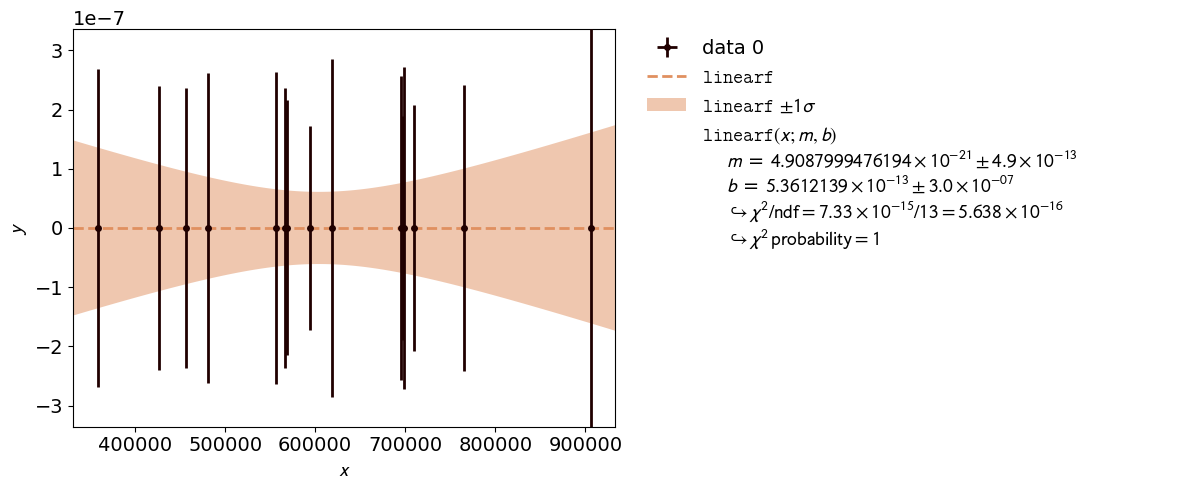

[[ 2.44207937e-25 -1.47518170e-19]
 [-1.47518170e-19  9.28241470e-14]]


In [19]:
#Hier wird der Geraden-Fit berechneet und geplottet

x_data = x
print("\n", "x_data:", x_data)
y_data = y
print("\n", "y_data:", y_data)                                                                                                                                                                                                                                                                           

x_err = x_err
print("\n", "x_err:", x_err)

y_err = y_err
print("\n", "y_err:", y_err)

N = len(x_data)

from kafe2 import XYContainer, Fit, Plot
import matplotlib.pyplot as plt
import numpy as np

#N = Anzahl der Wertepaare
print("Anzahl der Wertepaare N:" , N)

#Umbenennen der Variablen
x=x_data
y=y_data
# Fehler x_err und y_err werden aus der vorherigen zelle übernommen

#Bildung der Varianzgewichteten Mittelwerte z ∈ {x, y, xy, x^2}

#Bildung von Zähler und Nenner der Rechnungen z/y_err**2
sumyerr  = sum(1/(y_err)**2)
#print("Dies ist der Nenner der Mittelwerte:", sumyerr)
xdivyerr = sum(x/(y_err)**2)
#print("Dies ist der Zähler des x-Mittelwert:", xdivyerr)
ydivyerr = sum(y/(y_err)**2)
#print("Dies ist der Zähler des y-Mittelwert:", ydivyerr)
x2divyerr = sum((x**2)/(y_err)**2)
#print("Dies ist der Zähler des x^2-Mittelwert:", x2divyerr)
xydivyerr = sum((x*y)/(y_err)**2)
#print("Dies ist der Zähler des xy-Mittelwert:", xydivyerr)

#Bildung der Varianzgewichteten Mittelwerte
xMittel = xdivyerr/sumyerr
#print("Dies ist der varianzgewichteter Mittelwert von X: ",xMittel)
yMittel = ydivyerr/sumyerr
#print("Dies ist der varianzgewichteter Mittelwert von Y: ",yMittel)
x2Mittel = x2divyerr/sumyerr
#print("Dies ist der Mittelwert von X^2: ",x2Mittel)
xyMittel = xydivyerr/sumyerr
#print("Dies ist der Mittelwert von XY: ",xyMittel)


#Berechnung von m und n:
m_fit = (xyMittel-(xMittel*yMittel))/(x2Mittel-(xMittel)**2) #Steigung m
print("Dies ist die Steigung m: ",m_fit)
n_fit = yMittel - m_fit*xMittel #Achsenabschnitt n
print("Dies ist der y-Achsenabschnitt n: ",n_fit)

#Berechnung von den Varianzen:
sigmayMittel = N/sumyerr #Varianzgewichtete Standardabweichung Sigmay
#print("Dies ist die Varianzgemittelte Standardabweichung Sigmay: ", sigmayMittel)
Vm = sigmayMittel/(16*(x2Mittel-(xMittel)**2)) #Varianz der Steigung
print("Dies ist die Varianz auf m (V[m]): ",Vm)
Vn = x2Mittel*Vm #Varianz des Achsenabschnitt
print("Dies ist die Varianz auf n (V[n]): ",Vn)
Vmn = -Vm * xMittel #Kovarianz von m und n
print("Dies ist die Kovarianz von m und n (Vmn): ",Vmn)

#Berechnung der Güte:
xi2array = (y-m_fit*x-n_fit)**2/y_err #
xi2 = sum(xi2array)
#print("Dies ist der xi^2-Wert des Fits: ",xi2)
güte = xi2/(14-2) #Güte
print("Wir erhalten die Güte als: ", güte)


def linearf(x, m, b):# lineare Funktion aufstellen
    return m*x+b
def linfit(x_data, y_data, x_err, y_err): # funktion mit den daten als argumenten erstellen
    xy_data = XYContainer(x_data, y_data) # behälter für x und y erstellen
    #xy_data.add_error(axis='x', err_val=x_err) # x-Fehlerbalken
    xy_data.add_error(axis='y', err_val=y_err) # y-Fehlerbalken
    linear_fit = Fit(data=xy_data, model_function=linearf) # Objekt mit dem xy- Behälter und der linearen Funkrion erzeugen
    fit_results = linear_fit.do_fit() # ergebnisse bestimmen und später ausgeben lassen
    #linear_fit.report()
    plot = Plot(fit_objects=linear_fit) 
    plot.plot()
    
    #plot als jpg abspeichern und anzeigen
    plt.savefig('242i_Fit.jpg', dpi = 300)
    plt.show() #Plot anzeigen
    return fit_results

# Ergebnisse in der Kovarianzmatrix ausgeben lassen
print(linfit(x_data, y_data, x_err, y_err)['parameter_cov_mat'])

# 242.k

In [20]:
##### 242_k
print(f'{"242_k)":#^50}')

print("e/m aus dem Fit in C/kg:", spez_lad)
print("Fehler auf e/m aus dem Fit in C:", spez_lad_err)

print("n_fit:", n_fit)
e = (n_fit)**(3/2) #aus dem Fit
print("e aus dem Fit:", e)
e_err = (Vn)**(3/2) #aus dem Fit
print("Fehler auf e aus dem Fit:", e_err)

m_e = e/spez_lad
print("Masse eines Elektrons in kg:", m_e)
m_e_err = (((1/spez_lad)*e_err)**2+((-e/spez_lad**2)*spez_lad_err)**2)**(1/2)
print("Fehler auf m_e in kg:", m_e_err)


#################### Literaturwerte ####################
print(f'{"Literaturwerte":#^50}')

e_lit = 1.602_176_634*10**(-19) #https://physics.nist.gov/cgi-bin/cuu/Value?e
print("Literaturwert für e:", e_lit)

spez_lad_lit = -1.758_820_010_76*10**11 #in C/kg, https://physics.nist.gov/cgi-bin/cuu/Value?esme
print("Literaturwert für e/m:", spez_lad_lit)
spez_lad_lit_err = 0.000_000_000_53*10**11 #in C/kg,  https://physics.nist.gov/cgi-bin/cuu/Value?esme
#print("Fehler auf Literaturwert für e/m:", spez_lad_lit_err)

m_lit = 9.109_381_88*10**(-31) # in kg https://www.chemie.de/lexikon/Elektron.html
print("Literaturwert von m:", m_lit)

######################242_k)######################
e/m aus dem Fit in C/kg: 90790306504.4553
Fehler auf e/m aus dem Fit in C: 3387.4393685348855
n_fit: 5.36507867427774e-13
e aus dem Fit: 3.92974293972184e-19
Fehler auf e aus dem Fit: 2.567132930989123e-20
Masse eines Elektrons in kg: 4.328372808752438e-30
Fehler auf m_e in kg: 2.8275407693040074e-31
##################Literaturwerte##################
Literaturwert für e: 1.6021766340000001e-19
Literaturwert für e/m: -175882001076.0
Literaturwert von m: 9.109381880000002e-31
